In [1]:
!pip install tensorflow==2.15.0
!pip install keras==2.15.0
!pip install keras-cv==0.6.1 keras-core

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 101.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installatio

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import optimizers
import keras_cv
import numpy as np
from keras_cv import bounding_box
import os
import resource
from keras_cv import visualization
import tqdm
import json

Using TensorFlow backend


In [3]:
# path_to_downloaded_file = keras.utils.get_file(
#     origin="https://drive.google.com/uc?export=download&id=1wqEbF4V3PwLzyaR7nM0LyTt01RL44hcc",
#     extract=True,
# )
# path_to_downloaded_file = 'archivetest.zip'
!gdown 1wqEbF4V3PwLzyaR7nM0LyTt01RL44hcc

Downloading...
From (original): https://drive.google.com/uc?id=1wqEbF4V3PwLzyaR7nM0LyTt01RL44hcc
From (redirected): https://drive.google.com/uc?id=1wqEbF4V3PwLzyaR7nM0LyTt01RL44hcc&confirm=t&uuid=9e3a08a5-c622-430b-a7a0-1c32741b0f9c
To: /content/archivetest.zip
100% 1.08G/1.08G [00:31<00:00, 34.5MB/s]


In [4]:
!ls

archivetest.zip  sample_data


In [5]:
!unzip archivetest.zip -d .

Streaming output truncated to the last 5000 lines.
  inflating: ./Senior-Design-VIAD-4/train/traffic-light-819-_jpg.rf.9ad685958a62789c009e145b95c20fb5.jpg  
  inflating: ./Senior-Design-VIAD-4/train/traffic-light-819-_jpg.rf.ac144ec6c9246376d437f7bb116e7b7f.jpg  
  inflating: ./Senior-Design-VIAD-4/train/traffic-light-819-_jpg.rf.b923c2d5c3ff21e7c89f5e1af8df147c.jpg  
  inflating: ./Senior-Design-VIAD-4/train/traffic-light-819-_jpg.rf.c1c1e751997edc4f93c8228819ee4d9b.jpg  
  inflating: ./Senior-Design-VIAD-4/train/traffic-light-819-_jpg.rf.c9f5c9073b96bc00533b5eed84732662.jpg  
  inflating: ./Senior-Design-VIAD-4/train/traffic-light-819-_jpg.rf.cbcb390c28ccff14d3319e134de7add2.jpg  
  inflating: ./Senior-Design-VIAD-4/train/traffic-light-819-_jpg.rf.e5d470d3d89806960f99f226adfb33aa.jpg  
  inflating: ./Senior-Design-VIAD-4/train/traffic-light-819-_jpg.rf.f037177920fc67483d02505d6d3b0ca7.jpg  
  inflating: ./Senior-Design-VIAD-4/train/traffic-light-819-_jpg.rf.fe97e03dc6ce989849a6cf6f3

In [6]:
!ls

archivetest.zip  sample_data  Senior-Design-VIAD-4


In [ ]:
!ls 'Senior-Design-VIAD-4/train'

000000000659_jpg.rf.2e3aef4738d39d385589aa2bbd33e504.jpg
000000000659_jpg.rf.c6f41667c67294e3e5edec6584568ca0.jpg
000000000659_jpg.rf.cada8125664b91a9737d2b53db1c9160.jpg
000000000795_jpg.rf.6274b6bfdca9bab1b5247d396faeda5f.jpg
000000000795_jpg.rf.e860f4acf85b7e645ec388e6a322c199.jpg
000000000795_jpg.rf.ebfce562e6c3d14c3267ddeaee038155.jpg
000000000923_jpg.rf.487d022b85eabd393a9723b05c2a28aa.jpg
000000000923_jpg.rf.5225c0a92768f72f8fb44295e08ceeb8.jpg
000000000923_jpg.rf.527f1559099e49fc8bfdb38db23cc47c.jpg
000000001090_jpg.rf.3d0462b5038d104fdb7a796bd961552a.jpg
000000001090_jpg.rf.c7493fb9364d4121b5ad466b7a370fc1.jpg
000000001090_jpg.rf.d514b3df3c7af8d6a9843be4840366f1.jpg
000000001122_jpg.rf.30ae06d40ef2e2d462b297b1893e8302.jpg
000000001122_jpg.rf.5b798d2e76a9fe5f07380c1f6c0f1650.jpg
000000001122_jpg.rf.f531da9369f47a0bd1ab1b49cbfb89e1.jpg
000000001171_jpg.rf.66be3f19f5ee527aafb142fb38d7639a.jpg
000000001171_jpg.rf.7373835ca2ea24eb7aed276a85fb4651.jpg
000000001171_jpg.rf.a5c46426d2d

In [7]:
with open('Senior-Design-VIAD-4/train/_annotations.coco.json') as f:
  j = json.load(f)

In [8]:
class_mapping = {c['id']: c['name'] for c in j['categories']}
class_mapping

{0: 'cars-bikes-people',
 1: 'Bus',
 2: 'Bushes',
 3: 'Person',
 4: 'Truck',
 5: 'backpack',
 6: 'bench',
 7: 'bicycle',
 8: 'boat',
 9: 'branch',
 10: 'car',
 11: 'chair',
 12: 'clock',
 13: 'crosswalk',
 14: 'door',
 15: 'elevator',
 16: 'fire_hydrant',
 17: 'green_light',
 18: 'gun',
 19: 'handbag',
 20: 'motorcycle',
 21: 'person',
 22: 'pothole',
 23: 'rat',
 24: 'red_light',
 25: 'scooter',
 26: 'sheep',
 27: 'stairs',
 28: 'stop_sign',
 29: 'suitcase',
 30: 'traffic light',
 31: 'traffic_cone',
 32: 'train',
 33: 'tree',
 34: 'truck',
 35: 'umbrella',
 36: 'yellow_light'}

In [9]:
image_paths = [f"Senior-Design-VIAD-4/train/{d['file_name']}" for d in j['images']]

In [10]:
classes = [[] for _ in image_paths]
bounding_boxes = [[] for _ in image_paths]

In [11]:
for a in j['annotations']:
  if a['category_id'] not in [2,5,6,8,9,11,12,13,14,15,18,19,23,26,27,29,32,35]:
    idx = a['image_id']
    classes[idx].append(a['category_id'])
    bounding_boxes[idx].append(a['bbox'])

In [12]:
classes[:5]

[[],
 [],
 [1],
 [24, 24],
 [1, 10, 10, 10, 10, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]]

In [13]:
no_annotations = [len(x) == 0 for x in classes]

In [14]:
np.sum(no_annotations)

12276

In [15]:
image_paths = [x for x, na in zip(image_paths, no_annotations) if not na]

In [16]:
len(image_paths)

20235

In [17]:
len(classes)

32511

In [18]:
classes = [x for x, na in zip(classes, no_annotations) if not na]
bounding_boxes = [x for x, na in zip(bounding_boxes, no_annotations) if not na]

In [19]:
bbox = tf.ragged.constant(bounding_boxes)
classes = tf.ragged.constant(classes)
image_paths = tf.ragged.constant(image_paths)

data = tf.data.Dataset.from_tensor_slices((image_paths, classes, bbox))

In [20]:
len(data)

20235

In [21]:
smalldata = data.take(10_000)

In [22]:
len(smalldata)

10000

In [23]:
val_data = smalldata.take(2_000)
train_data = smalldata.skip(2_000)

In [24]:
def load_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    return image


def load_dataset(image_path, classes, bbox):
    # Read Image
    image = load_image(image_path)
    bounding_boxes = {
        "classes": tf.cast(classes, dtype=tf.float32),
        "boxes": bbox,
    }
    return {
        "images": tf.cast(image, tf.float32), "bounding_boxes": bounding_boxes}

In [25]:
# Hyperparams
BATCH_SIZE = 4

In [26]:
augmenter = keras.Sequential(
    layers=[
        keras_cv.layers.RandomFlip(
            mode="horizontal", bounding_box_format="xywh"),
        keras_cv.layers.RandomShear(
            x_factor=0.2, y_factor=0.2, bounding_box_format="xywh"
        ),
        keras_cv.layers.JitteredResize(
            target_size=(640, 640),
            scale_factor=(0.75, 1.3),
            bounding_box_format="xywh"
        ),
    ]
)

In [27]:
# Create train dataset
train_ds = train_data.map(load_dataset, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.shuffle(BATCH_SIZE * 4)
train_ds = train_ds.ragged_batch(BATCH_SIZE, drop_remainder=True)
train_ds = train_ds.map(augmenter, num_parallel_calls=tf.data.AUTOTUNE)

In [28]:
# Create validation dataset
resizing = keras_cv.layers.Resizing(
    640, 640, bounding_box_format="xywh", pad_to_aspect_ratio=True
)

val_ds = val_data.map(load_dataset, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.shuffle(BATCH_SIZE * 4)
val_ds = val_ds.ragged_batch(BATCH_SIZE, drop_remainder=True)
val_ds = val_ds.map(resizing, num_parallel_calls=tf.data.AUTOTUNE)

In [29]:
def visualize_dataset(inputs, value_range, rows, cols, bounding_box_format):
    inputs = next(iter(inputs.take(1)))
    images, bounding_boxes = inputs["images"], inputs["bounding_boxes"]
    visualization.plot_bounding_box_gallery(
        images,
        value_range=value_range,
        rows=rows,
        cols=cols,
        y_true=bounding_boxes,
        scale=5,
        font_scale=0.7,
        bounding_box_format=bounding_box_format,
        class_mapping=class_mapping,
    )

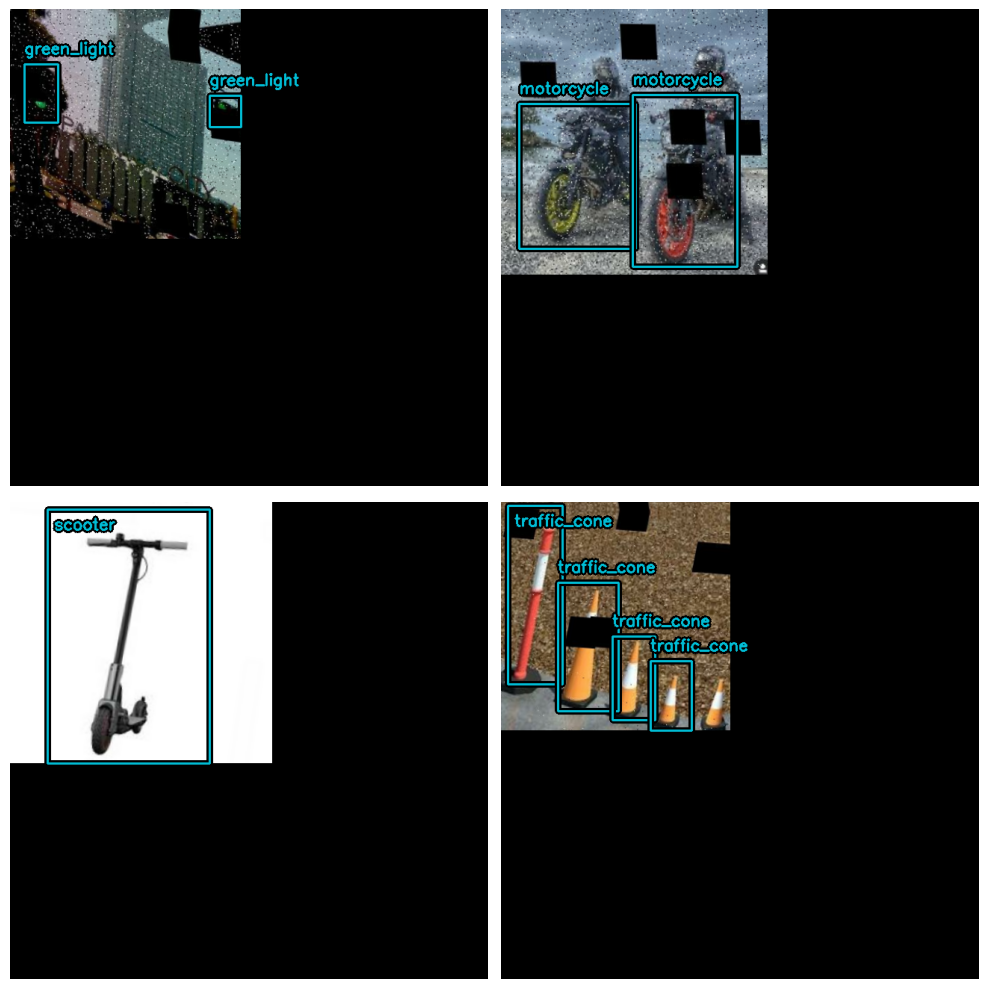

In [30]:
visualize_dataset(
    train_ds, bounding_box_format="xywh", value_range=(0, 255), rows=2, cols=2
)

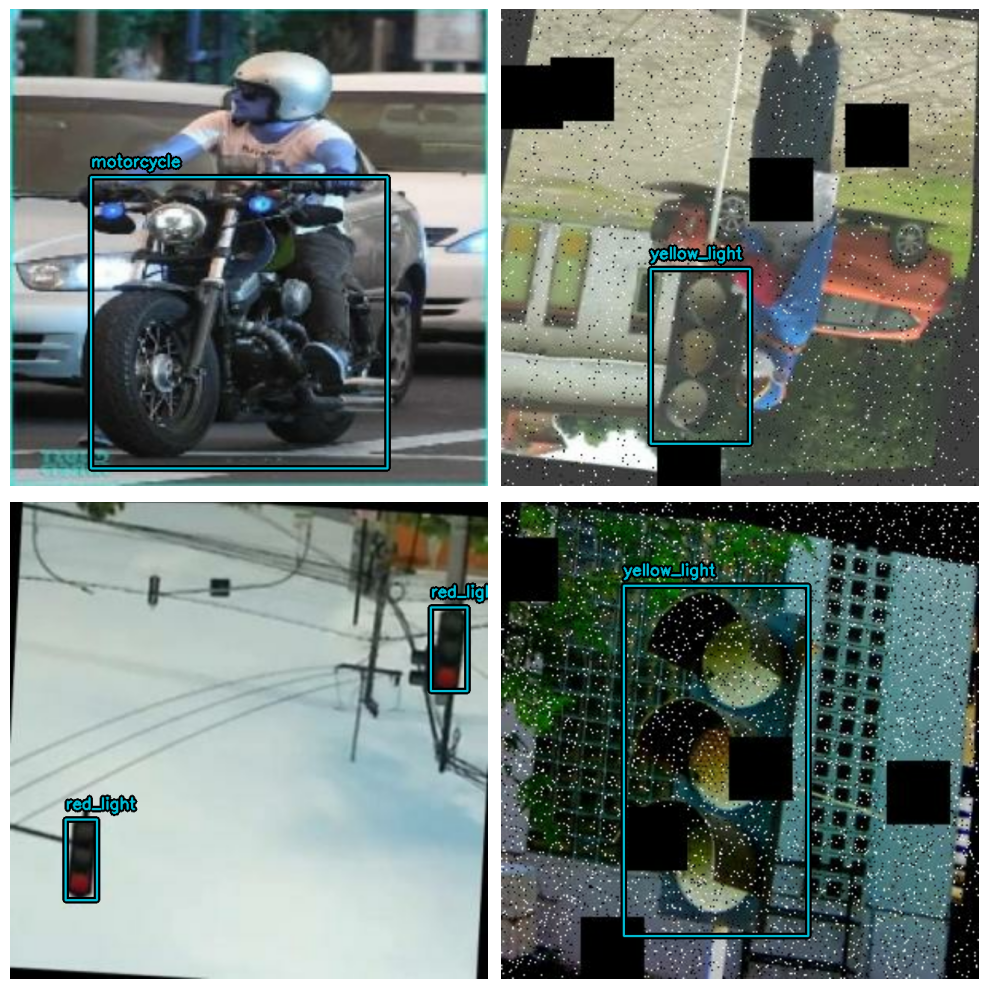

In [31]:
visualize_dataset(
    val_ds, bounding_box_format="xywh", value_range=(0, 255), rows=2, cols=2
)

In [32]:
def dict_to_tuple(inputs):
    return inputs["images"], bounding_box.to_dense(
        inputs["bounding_boxes"], max_boxes=32
    )


train_ds = train_ds.map(dict_to_tuple, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)

val_ds = val_ds.map(dict_to_tuple, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

In [33]:
# Global clipnorm helps to reduce exploding gradient

base_lr = 0.005
# including a global_clipnorm is extremely important in object detection tasks
optimizer = tf.keras.optimizers.SGD(
    learning_rate=base_lr, momentum=0.9, global_clipnorm=10.0
)

In [34]:
# Creates a "RetinaNet" from ResNet50 backbone

model = keras_cv.models.RetinaNet.from_preset(
    "resnet50_imagenet",
    num_classes=len(class_mapping),
    bounding_box_format="xywh",
)

94657128/94657128 [==============================] - 7s 0us/step


In [35]:
model.compile(
    classification_loss="focal",
    box_loss="smoothl1",
    optimizer=optimizer,
)

In [1]:
# Remove take(20) for full training (takes very long!)
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
)

NameError: name 'model' is not defined

In [ ]:
# Let's create a simple function to plot our inferences
def visualize_detections(model, dataset, bounding_box_format):
    images, y_true = next(iter(dataset.take(1)))
    y_pred = model.predict(images)
    y_pred = bounding_box.to_ragged(y_pred)
    visualization.plot_bounding_box_gallery(
        images,
        value_range=(0, 255),
        bounding_box_format=bounding_box_format,
        y_true=y_true,
        y_pred=y_pred,
        scale=4,
        rows=4,
        cols=2,
        show=True,
        font_scale=0.7,
        class_mapping=class_mapping,
    )

In [ ]:
# Set IoU and confidence threshold
model.prediction_decoder = keras_cv.layers.MultiClassNonMaxSuppression(
    bounding_box_format="xywh",
    from_logits=True,
    iou_threshold=0.7,
    confidence_threshold=0.4,
)

In [ ]:
# construct a dataset with larger batches:
visualization_ds = val_ds.unbatch()
visualization_ds = visualization_ds.ragged_batch(16)
visualization_ds = visualization_ds.shuffle(8)

1/1 [==============================] - 3s 3s/step


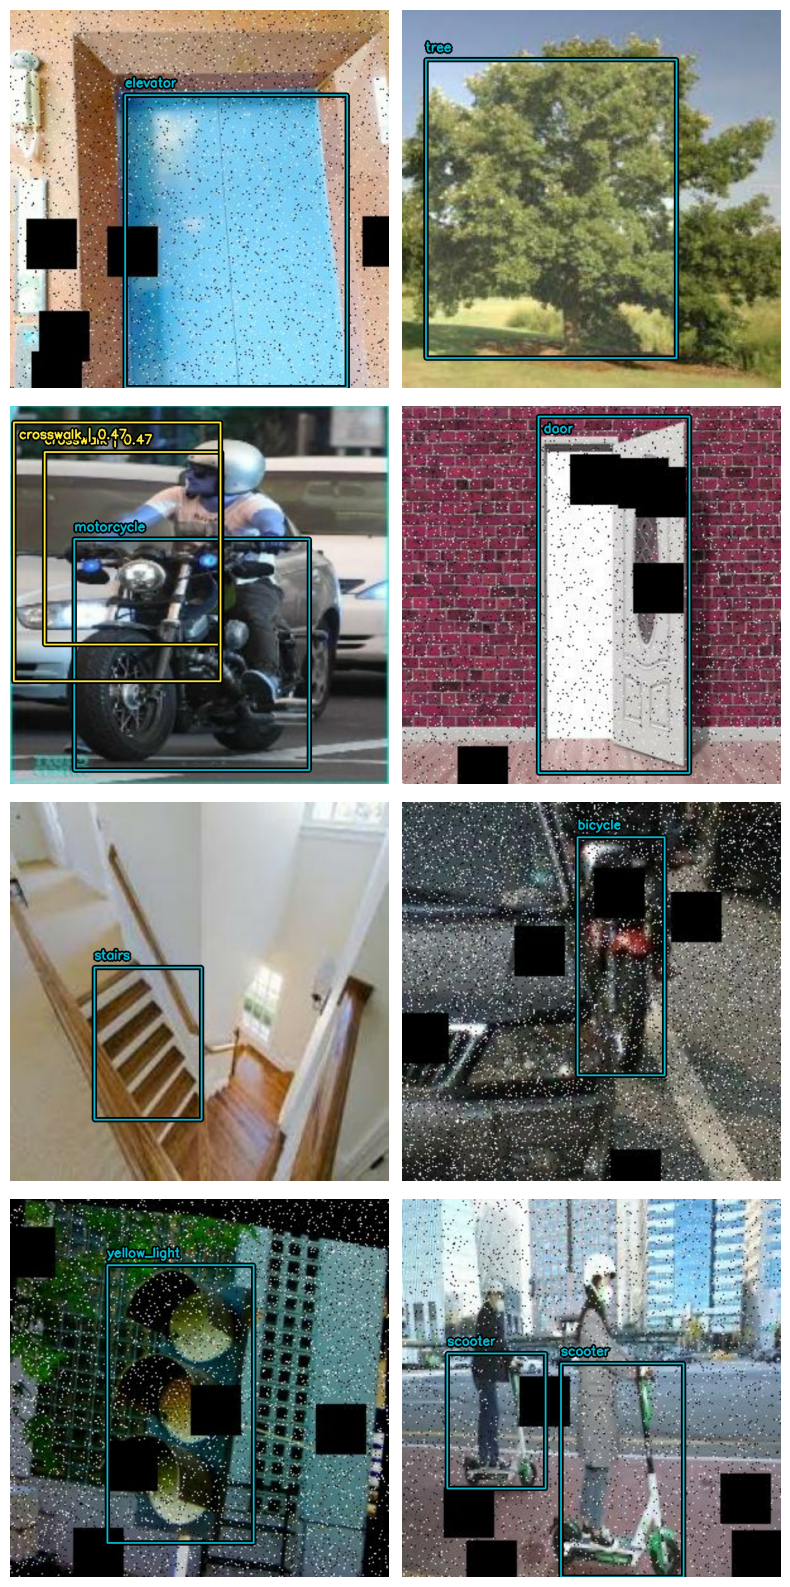

In [ ]:
visualize_detections(model, dataset=visualization_ds, bounding_box_format="xywh")

In [ ]:
import cv2
img2 = cv2.imread("traffic2.jpg")
img2 = cv2.resize(img2, (640, 640))
img = cv2.imread("traffic2.jpg")
img = cv2.resize(img, (640, 640))
img = np.expand_dims(img, axis=0)
y_pred = model.predict(img)
y_pred
# y_pred = bounding_box.to_ragged(y_pred)
# visualization.plot_bounding_box_gallery(
#         img,
#         value_range=(0, 255),
#         bounding_box_format="xywh",
#         y_pred=y_pred,
#         scale=4,
#         rows=1,
#         cols=1,
#         show=True,
#         font_scale=0.7,
#         class_mapping=class_mapping,
#     )

1/1 [==============================] - 3s 3s/step


{'boxes': <tf.RaggedTensor [[]]>,
 'confidence': <tf.RaggedTensor [[]]>,
 'classes': <tf.RaggedTensor [[]]>,
 'num_detections': array([0], dtype=int32)}

In [ ]:
def processit(img, y_pred):
    print(y_pred)
    image_height, image_width, _ = img.shape
            # image = Image.open(f"{INPUT_DIRECTORY}/radio.png")
            # new_image = image.resize((64, 64))
            # new_image.save('xyz.png')
            # img = cv2.imread("xyz.png")
            # img2 = cv2.resize(img, (64, 64))
            # print(img2.shape)

    #image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # m = tf.keras.models.load_model("tfmodel")

    #out = face_detection.process(image_rgb)
    # out = m.predict(img2)

    # if y_pred.detections is not None:
    for ind in range(len(y_pred["boxes"][0])):
        box = y_pred["boxes"][0][ind].numpy()
        x1, y1, w, h = box[0], box[1], box[2], box[3]

        # print(str(x1) + "," + str(y1) + "," +  str(w) + "," + str(h))

        x1 = int(x1)
        y1 = int(y1)
        w = int(w)
        h = int(h)
        area = w*h
        print(area)

        color = (0, 255, 0)
        if area > 18000:
          color = (0, 0, 255)
        #image[y1: y1 + h, x1:x1 + w, :] = cv2.blur(image[y1:(y1 + h), x1:(x1 + w), :], (30, 30))
        img = cv2.rectangle(img, (x1, y1), (x1 + w, y1 + h), color, 2)
        cv2.putText(img, class_mapping[int(y_pred["classes"][0][ind])], (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
    return img

In [ ]:
# from google.colab.patches import cv2_imshow
# img2 = cv2.imread("test3.png")
# img2 = cv2.resize(img2, (640, 640))
# img = cv2.imread("test3.png")
# img = cv2.resize(img, (640, 640))
# img = np.expand_dims(img, axis=0)
# y_pred = model.predict(img)
# x = processit(img2, y_pred)
# cv2_imshow(x)
video_capture = cv2.VideoCapture("test6.mov")
ret, frame = video_capture.read()
a = frame.shape[1]
b = frame.shape[0]

output_video = cv2.VideoWriter("test6p.mp4",
                                cv2.VideoWriter_fourcc(*"MP4V"),
                                25,
                                (a, b))

while ret:
    frame = cv2.resize(frame, (640, 640))
    frame2 = cv2.resize(frame, (640, 640))
    frame2 = np.expand_dims(frame2, axis=0)
    x = model.predict(frame2)
    frame = processit(frame, x)
    frame = cv2.resize(frame, (a, b))
    output_video.write(frame)

    ret, frame = video_capture.read()

video_capture.release()
output_video.release()

1/1 [==============================] - 0s 122ms/step
{'boxes': <tf.RaggedTensor [[]]>, 'confidence': <tf.RaggedTensor [[]]>, 'classes': <tf.RaggedTensor [[]]>, 'num_detections': array([0], dtype=int32)}
1/1 [==============================] - 0s 120ms/step
{'boxes': <tf.RaggedTensor [[]]>, 'confidence': <tf.RaggedTensor [[]]>, 'classes': <tf.RaggedTensor [[]]>, 'num_detections': array([0], dtype=int32)}
1/1 [==============================] - 0s 112ms/step
{'boxes': <tf.RaggedTensor [[]]>, 'confidence': <tf.RaggedTensor [[]]>, 'classes': <tf.RaggedTensor [[]]>, 'num_detections': array([0], dtype=int32)}
1/1 [==============================] - 0s 114ms/step
{'boxes': <tf.RaggedTensor [[]]>, 'confidence': <tf.RaggedTensor [[]]>, 'classes': <tf.RaggedTensor [[]]>, 'num_detections': array([0], dtype=int32)}
1/1 [==============================] - 0s 128ms/step
{'boxes': <tf.RaggedTensor [[]]>, 'confidence': <tf.RaggedTensor [[]]>, 'classes': <tf.RaggedTensor [[]]>, 'num_detections': array([0],

In [ ]:
model.save("latest", save_format="tf")

![](https://deeplearningcourses.com/notebooks_v3_pxl?sc=nfPJUDwvpNbVBFHob3I2dw&n=Train+Object+Detection+Custom+Dataset)

MessageError: Error: credential propagation was unsuccessful